K-Means Clustering

Importing libraries and exploring the dataset.

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.pyplot import figure


In [ ]:
data = pd.read_csv("Mall_Customers.csv")

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Shape of data
data.shape

(200, 5)

In [ ]:
#Checking if any null values present
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#Getting 5 point summary of our dataframe
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


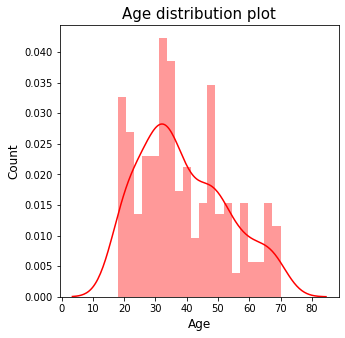

In [ ]:
# distribution plot for 'Age'
sns.distplot(data['Age'],color= 'red',bins=20)
plt.title('Age distribution plot', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


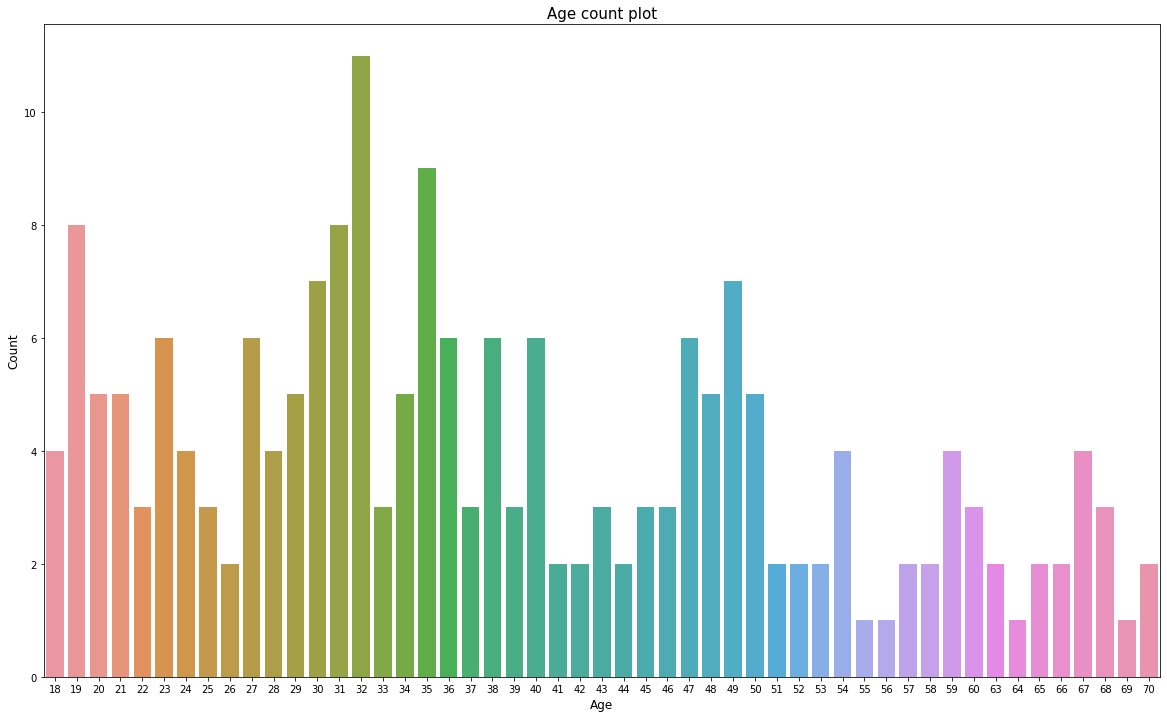

In [ ]:
# count plot for 'Age'
plt.figure(figsize=(20,12))
sns.countplot(data['Age'])
plt.title('Age count plot', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

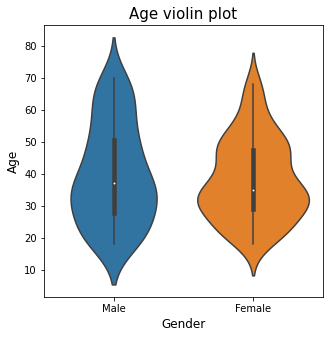

In [ ]:
# violin plot for 'Age'
sns.violinplot(y = 'Age' , x = 'Gender' , data = data)
plt.title('Age violin plot', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Age', fontsize = 12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


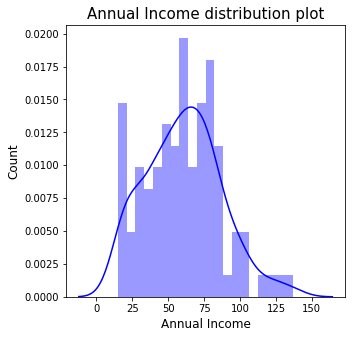

In [ ]:
# distribution plot for 'Annual Income'
sns.distplot(data['Annual Income (k$)'],color= 'blue',bins=20)
plt.title('Annual Income distribution plot', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

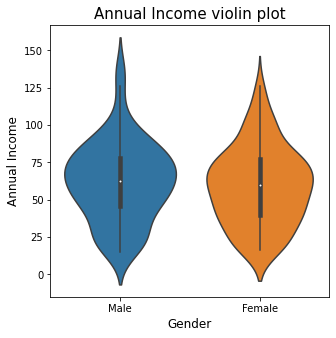

In [ ]:
# violin plot for 'Annual Income'
sns.violinplot(y = 'Annual Income (k$)' , x = 'Gender' , data = data)
plt.title('Annual Income violin plot', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Annual Income', fontsize = 12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


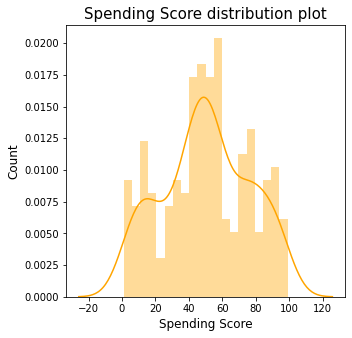

In [ ]:
# distribution plot for 'Spending Score'
sns.distplot(data['Spending Score (1-100)'],color= 'orange',bins=20)
plt.title('Spending Score distribution plot', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


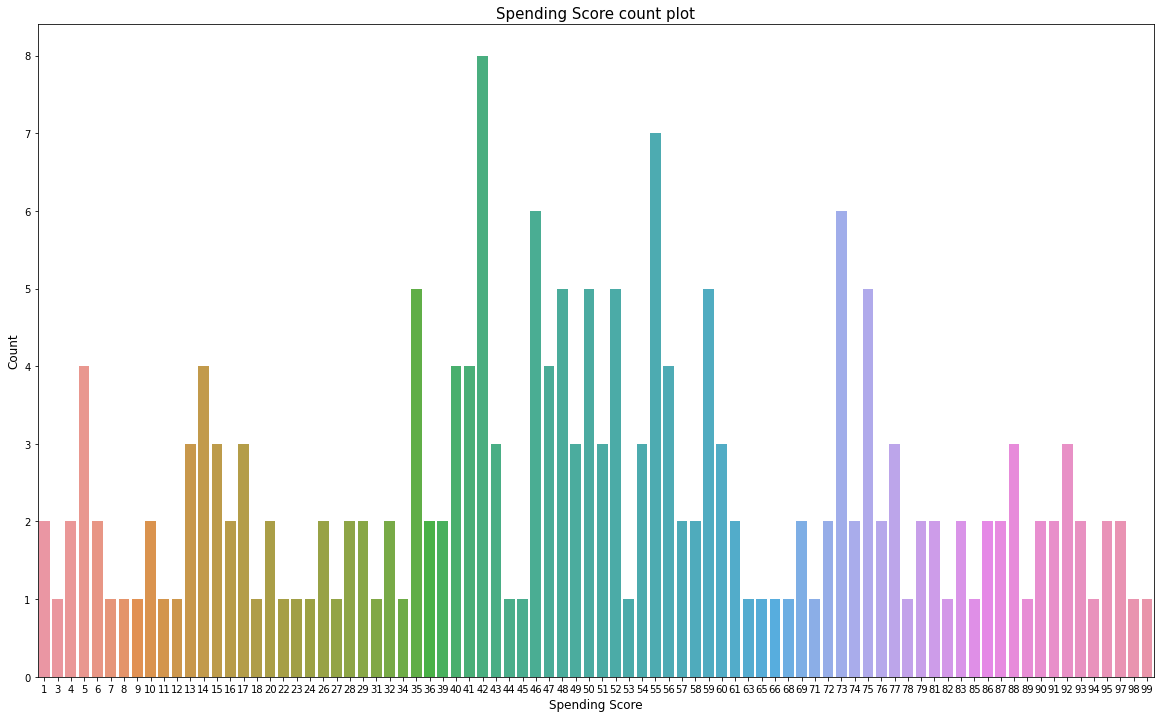

In [ ]:
# count plot for 'Spending Score'
plt.figure(figsize=(20,12))
sns.countplot(data['Spending Score (1-100)'])
plt.title('Spending Score count plot', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

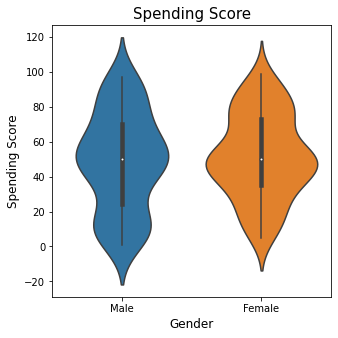

In [ ]:
# violin plot for 'Spending Score'
sns.violinplot(y = 'Spending Score (1-100)' , x = 'Gender' , data = data)
plt.title('Spending Score', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()

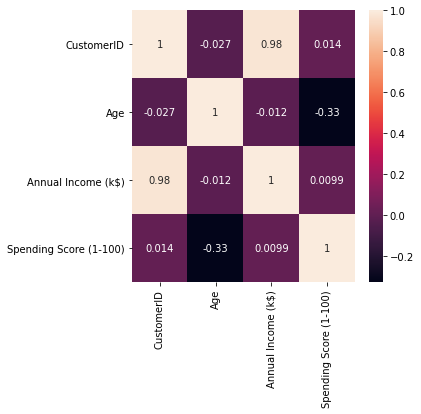

In [ ]:
# heatmap to show correlation of various Attributes
sns.heatmap(data.corr(), annot = True)

Model

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
l3 = LabelEncoder()

In [ ]:
label = l3.fit_transform(data["Gender"])

In [ ]:
label

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [ ]:
myData = data.drop("Gender",axis="columns")

In [ ]:
myData["Gender"] = label

In [ ]:
myData.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


Modelling

In [ ]:
X = myData.iloc[:, 1:5].values

In [ ]:
X

array([[ 19,  15,  39,   1],
       [ 21,  15,  81,   1],
       [ 20,  16,   6,   0],
       [ 23,  16,  77,   0],
       [ 31,  17,  40,   0],
       [ 22,  17,  76,   0],
       [ 35,  18,   6,   0],
       [ 23,  18,  94,   0],
       [ 64,  19,   3,   1],
       [ 30,  19,  72,   0],
       [ 67,  19,  14,   1],
       [ 35,  19,  99,   0],
       [ 58,  20,  15,   0],
       [ 24,  20,  77,   0],
       [ 37,  20,  13,   1],
       [ 22,  20,  79,   1],
       [ 35,  21,  35,   0],
       [ 20,  21,  66,   1],
       [ 52,  23,  29,   1],
       [ 35,  23,  98,   0],
       [ 35,  24,  35,   1],
       [ 25,  24,  73,   1],
       [ 46,  25,   5,   0],
       [ 31,  25,  73,   1],
       [ 54,  28,  14,   0],
       [ 29,  28,  82,   1],
       [ 45,  28,  32,   0],
       [ 35,  28,  61,   1],
       [ 40,  29,  31,   0],
       [ 23,  29,  87,   0],
       [ 60,  30,   4,   1],
       [ 21,  30,  73,   0],
       [ 53,  33,   4,   1],
       [ 18,  33,  92,   1],
       [ 49,  

Clustering and visualizing based on income and spending score

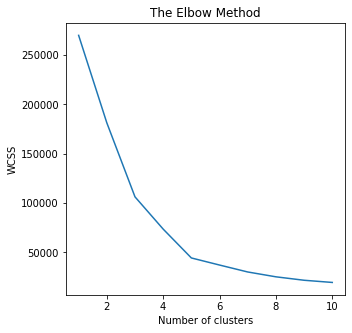

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X[:,[1,2]])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Optimum is 5 clusters

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X[:,[1,2]])

In [ ]:
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


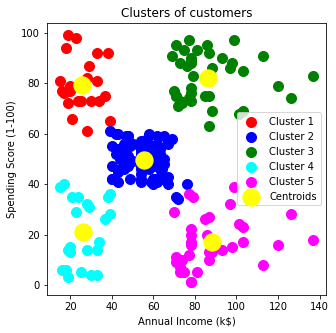

In [ ]:
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.rcParams['figure.figsize'] = [5, 5]
   

plt.show()

Clustering and visualizing data based on Gender and age

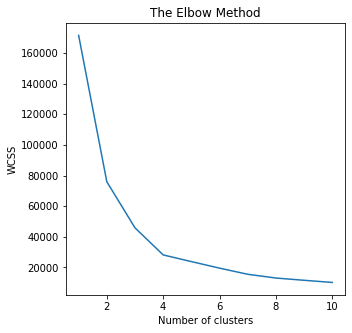

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X[:,[0,2]])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X[:,[0,2]])

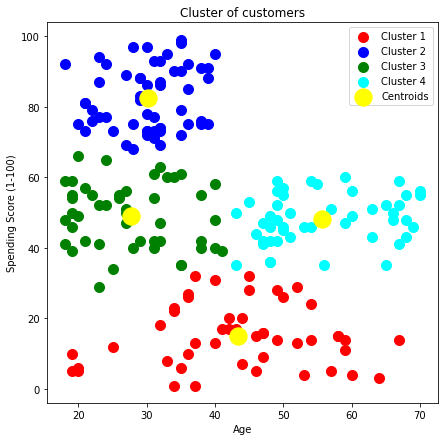

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.rcParams['figure.figsize'] = [7, 7]
plt.show()

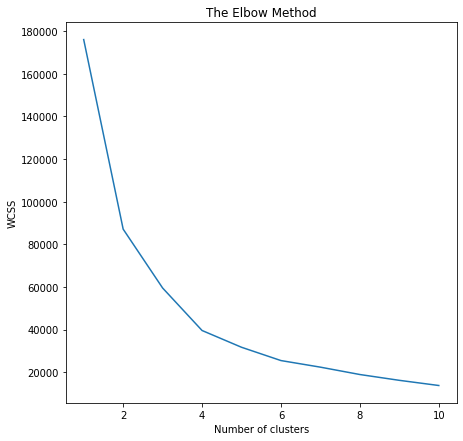

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X[:,[0,1]])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X[:,[0,1]])

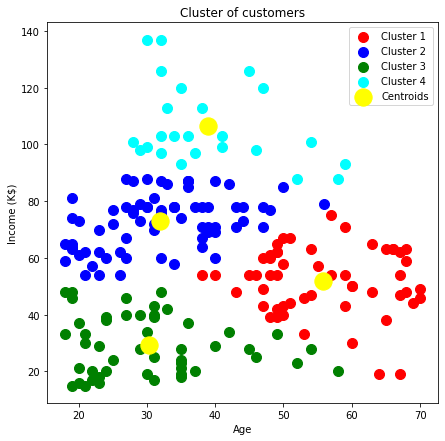

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster of customers')
plt.xlabel('Age')
plt.ylabel('Income (K$)')
plt.legend()
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()